In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the datasets
orders = pd.read_csv('orders.csv')
order_products_train = pd.read_csv('order_products__train.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
products = pd.read_csv('products.csv')
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')

In [4]:
# Basic data exploration
aisles.head()
departments.head()
orders.head()
order_products_prior.head()
order_products_train.head()
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
# Get a sense of the shape of each dataset
aisles.shape
departments.shape
orders.shape
order_products_prior.shape
order_products_train.shape
products.shape

(49688, 4)

In [6]:
# Check for missing data
aisles.isnull().sum()
departments.isnull().sum()
orders.isnull().sum()
order_products_prior.isnull().sum()
order_products_train.isnull().sum()
products.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [7]:
# Merge the datasets
order_products = pd.concat([order_products_prior, order_products_train])
order_products = order_products.merge(products, on='product_id', how='left')
order_products = order_products.merge(departments, on='department_id', how='left')
order_products = order_products.merge(aisles, on='aisle_id', how='left')
order_products = order_products.merge(orders, on='order_id', how='left')

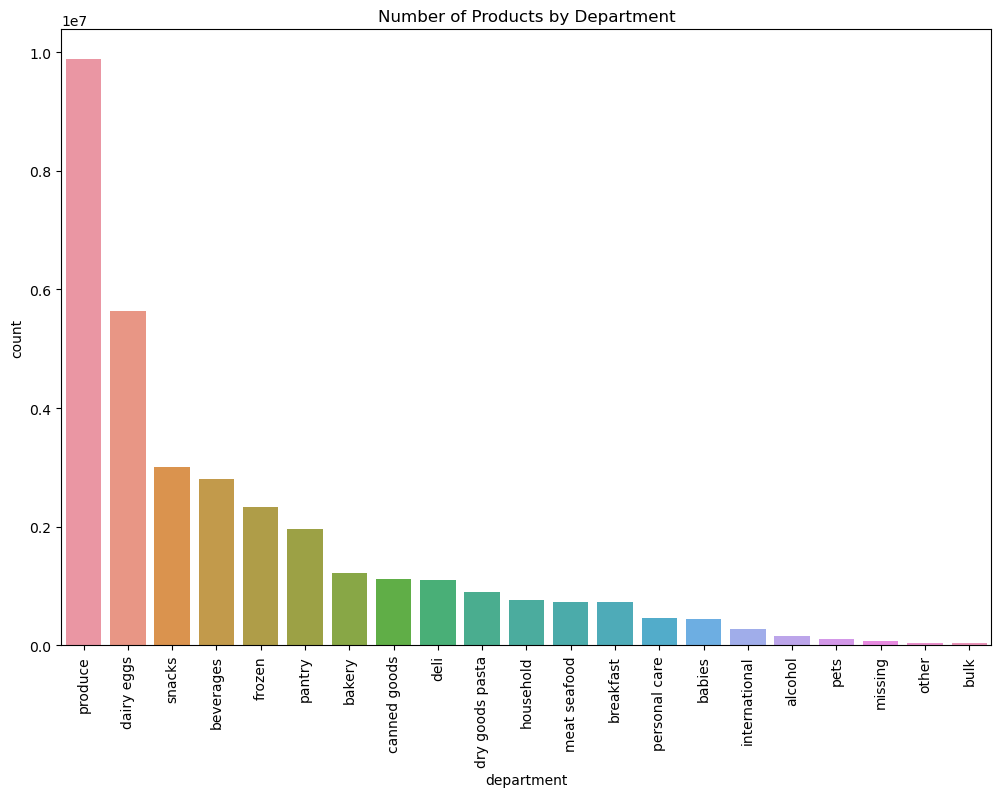

In [8]:
# Plot the distribution of products across departments
plt.figure(figsize=(12,8))
sns.countplot(x='department', data=order_products, order=order_products['department'].value_counts().index)
plt.title('Number of Products by Department')
plt.xticks(rotation=90)
plt.show()

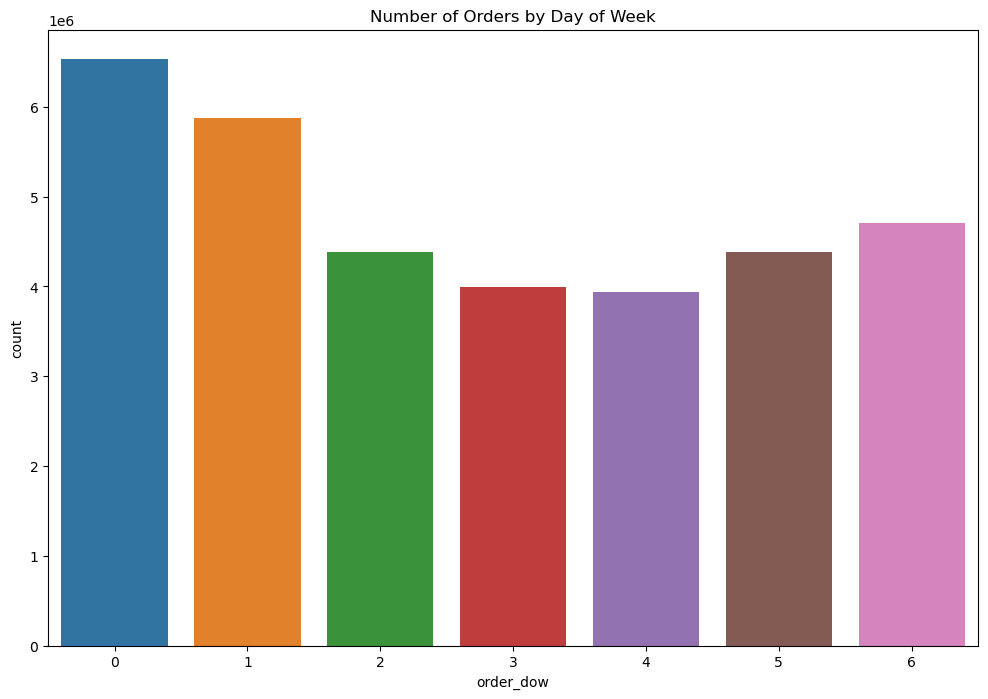

In [9]:
# Plot the number of orders made by day of the week
plt.figure(figsize=(12,8))
sns.countplot(x='order_dow', data=order_products)
plt.title('Number of Orders by Day of Week')
plt.show()

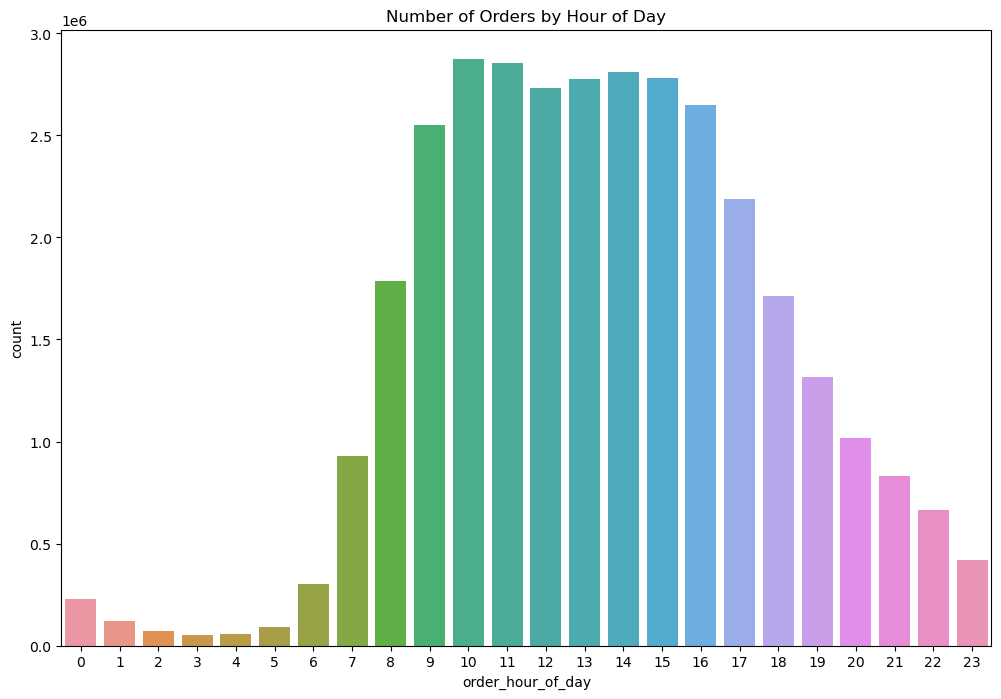

In [10]:
# Plot the time of day when orders are placed
plt.figure(figsize=(12,8))
sns.countplot(x='order_hour_of_day', data=order_products)
plt.title('Number of Orders by Hour of Day')
plt.show()

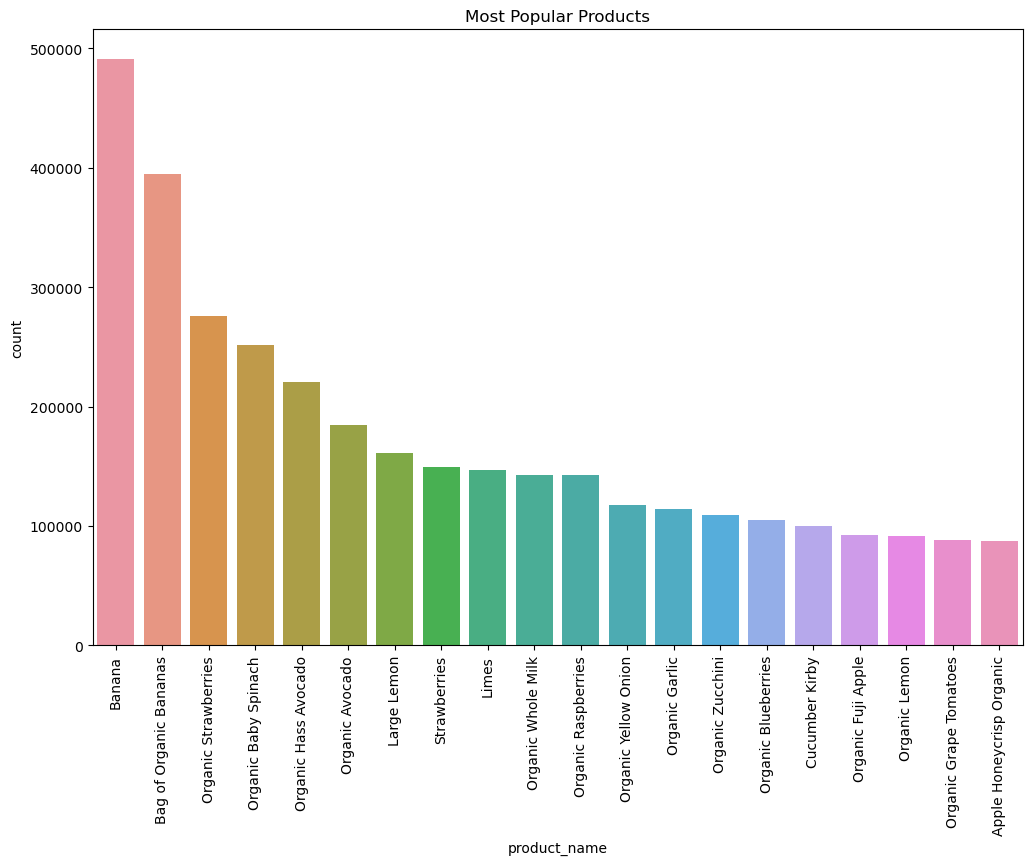

In [11]:
# Plot the most popular products overall
plt.figure(figsize=(12,8))
sns.countplot(x='product_name', data=order_products, order=order_products['product_name'].value_counts().iloc[:20].index)
plt.title('Most Popular Products')
plt.xticks(rotation=90)
plt.show()

In [12]:
# Calculate the average number of products per order
basket_sizes = order_products.groupby('order_id')['add_to_cart_order'].count().reset_index()
mean_basket_size = basket_sizes['add_to_cart_order'].mean()
print("Average basket size: ", round(mean_basket_size,2))

Average basket size:  10.11


In [13]:
# Calculate repeat customer rate
repeat_customers = (orders.groupby('user_id')['order_id'].nunique() > 1).sum()
total_customers = orders['user_id'].nunique()
repeat_customer_rate = repeat_customers / total_customers * 100
print("Repeat customer rate: ", round(repeat_customer_rate, 2), "%")

Repeat customer rate:  100.0 %


In [14]:
# Calculate order frequency
order_frequency = orders.groupby('user_id')['days_since_prior_order'].mean().reset_index()
mean_order_frequency = order_frequency['days_since_prior_order'].mean()
print("Average order frequency: ", round(mean_order_frequency, 2), "days")

Average order frequency:  15.45 days


In [15]:
# Most popular aisle by department
department_aisle_counts = order_products.groupby(['department', 'aisle'])['product_id'].count().reset_index()
department_aisle_counts = department_aisle_counts.sort_values(['department', 'product_id'], ascending=False)
top_aisle_by_department = department_aisle_counts.groupby('department').head(1)
print("Most popular aisle by department:")
print(top_aisle_by_department[['department', 'aisle', 'product_id']])

Most popular aisle by department:
          department                          aisle  product_id
124           snacks                 chips pretzels      753739
118          produce                   fresh fruits     3792661
116             pets                  cat food care       66306
114    personal care                           soap       66832
87            pantry             baking ingredients      339780
86             other                          other       38086
85           missing                        missing       77396
78      meat seafood         hot dogs bacon sausage      318468
74     international                    asian foods      173614
71         household                    paper goods      255690
61            frozen                 frozen produce      545107
48   dry goods pasta                      dry pasta      277935
44              deli                     lunch meat      412087
42        dairy eggs                         yogurt     1507583
32    

In [16]:
# Product popularity by department
department_product_counts = order_products.groupby(['department', 'product_id'])['order_id'].count().reset_index()
department_product_counts = department_product_counts.sort_values(['department', 'order_id'], ascending=False)
top_products_by_department = department_product_counts.groupby('department').head(1)
print("Most popular product by department:")
print(top_products_by_department[['department', 'product_id', 'order_id']])

Most popular product by department:
            department  product_id  order_id
45123           snacks       13870     25941
42607          produce       24852    491291
40911             pets        7076      1893
35840    personal care       12312      6199
32189           pantry       31506     52323
28697            other       38662      4150
28061          missing       41149      9189
26561     meat seafood       25890     52369
25831    international       36724     10690
22463        household        8021     29047
18659           frozen        9076     58269
16886  dry goods pasta       23375     20752
15527             deli       30489     74172
13202       dairy eggs       27845    142813
10352     canned goods       27156     39577
9131              bulk        5161     10596
8949         breakfast       41844     27959
7594         beverages       44632     79245
2271            bakery        5077     63114
2009            babies       43875      9103
49             alco